# **Importing Necessary Libraries and Tensor-Flow CNN training and testing framework**

In [7]:
import numpy as np
import pandas as pd

from keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D
from keras.layers import Activation, Dropout, BatchNormalization, Flatten, Dense, AvgPool2D,MaxPool2D
from keras.models import Sequential, Model
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.optimizers import Adam, SGD, RMSprop
import tensorflow as tf

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline



import os
for dirname, _, filenames in os.walk('/train'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [9]:
data = 'train/dataset'
os.listdir(data)

['normal', 'covid']

# Setting Training Parameters

In [10]:
image_width = 150
image_height = 150
cannels = 3

INPUT_SHAPE = (image_width, image_height, cannels)
NB_CLASSES = 2
EPOCHS = 45
BATCH_SIZE = 6

# Adding layers to the CNN

In [11]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=INPUT_SHAPE))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(Conv2D(250,(3,3)))
model.add(Activation("relu"))

model.add(Conv2D(128,(3,3)))
model.add(Activation("relu"))
model.add(AvgPool2D(2,2))
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(AvgPool2D(2,2))

model.add(Conv2D(256,(2,2)))
model.add(Activation("relu"))
model.add(MaxPool2D(2,2))

model.add(Flatten())
model.add(Dense(32))
model.add(Dropout(0.25))
model.add(Dense(1))
model.add(Activation("sigmoid"))

model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

# Training the Model

In [42]:
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    data,
    target_size=(image_height, image_width),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    data,
    target_size=(image_height, image_width),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle= False,
    subset='validation')

history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // BATCH_SIZE,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // BATCH_SIZE,
    epochs = EPOCHS)

Found 79 images belonging to 2 classes.
Found 19 images belonging to 2 classes.
Epoch 1/45


/var/folders/n3/zjzsl4dd6zvdgdmm1x46rczm0000gn/T/ipykernel_33195/3789260461.py:22: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


13/13 [==============================] - 3s 240ms/step - loss: 0.1339 - accuracy: 0.9589 - val_loss: 0.0031 - val_accuracy: 1.0000
Epoch 2/45
13/13 [==============================] - 3s 219ms/step - loss: 0.0724 - accuracy: 0.9726 - val_loss: 0.0060 - val_accuracy: 1.0000
Epoch 3/45
13/13 [==============================] - 3s 218ms/step - loss: 0.2435 - accuracy: 0.9315 - val_loss: 0.0555 - val_accuracy: 0.9444
Epoch 4/45
13/13 [==============================] - 3s 220ms/step - loss: 0.0451 - accuracy: 0.9726 - val_loss: 0.0298 - val_accuracy: 1.0000
Epoch 5/45
13/13 [==============================] - 3s 223ms/step - loss: 0.2112 - accuracy: 0.9589 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 6/45
13/13 [==============================] - 3s 218ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 1.5066e-04 - val_accuracy: 1.0000
Epoch 7/45
13/13 [==============================] - 3s 227ms/step - loss: 8.1273e-04 - accuracy: 1.0000 - val_loss: 0.5755 - val_accuracy: 0.9444
Epoch 8/4

# Model Accuracy Metrics

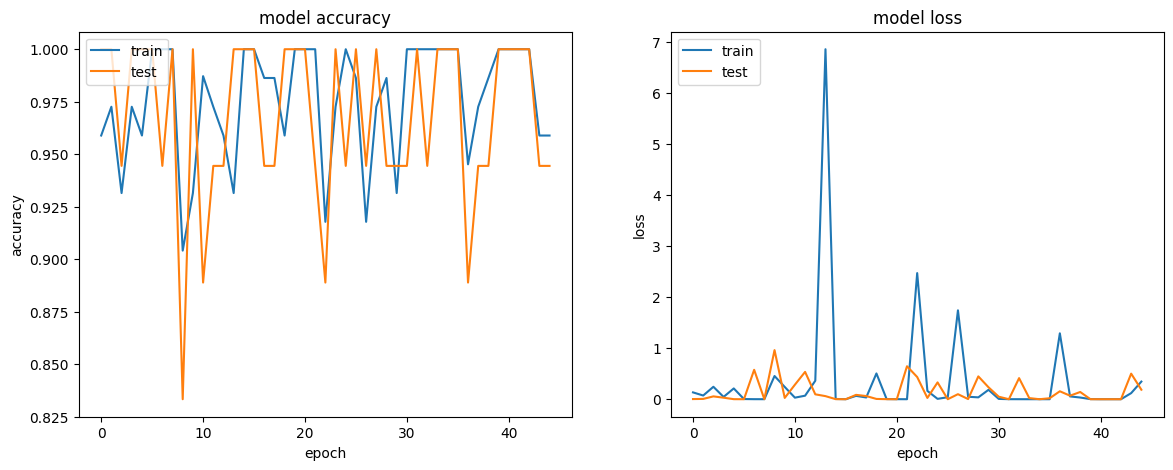

training_accuracy 0.9589040875434875
validation_accuracy 0.9444444179534912


In [43]:
fig , ax = plt.subplots(1,2, figsize=(14,5))
ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('model accuracy')
ax[0].set_ylabel('accuracy')
ax[0].set_xlabel('epoch')
ax[0].legend(['train', 'test'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('model loss')
ax[1].set_ylabel('loss')
ax[1].set_xlabel('epoch')
ax[1].legend(['train', 'test'], loc='upper left')
plt.show()

print("training_accuracy", history.history['accuracy'][-1])
print("validation_accuracy", history.history['val_accuracy'][-1])

# Labeling and Predictions

In [44]:
label = validation_generator.classes
pred= model.predict(validation_generator)
predicted_class_indices=np.argmax(pred,axis=1)
labels = (validation_generator.class_indices)
labels2 = dict((v,k) for k,v in labels.items())
predictions = [labels2[k] for k in predicted_class_indices]
print(predicted_class_indices)
print (labels)
print (predictions)

4/4 [==============================] - 1s 110ms/step
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
{'covid': 0, 'normal': 1}
['covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid']


# Labeling and Predictions on Novel Dataset

In [47]:
covid_images_dir = "/Users/bkleyner/CMU/Spring 2024/02251/COVIDImageDetection/Coronahack/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/test"
image_files = [os.path.join(covid_images_dir, f) for f in os.listdir(covid_images_dir) if os.path.isfile(os.path.join(covid_images_dir, f))]

total_images = len(image_files)
correct_predictions = 0

predictions = []
false_positives = 0
false_negatives = 0

path_to_csv = "Coronahack/Chest_xray_Corona_Metadata.csv"
df = pd.read_csv(path_to_csv)

df.set_index('X_ray_image_name')['Label_2_Virus_category']

for img_path in image_files:
    img = load_img(img_path, target_size=(150, 150))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    img_name = os.path.basename(img_path)
    actual_label = df.loc[df['X_ray_image_name'] == img_name]['Label_2_Virus_category'].values[0]
    if actual_label == 'COVID-19':
        actual_label = 1
    else:
        actual_label = 0
    prediction = model.predict(img_array)
    predicted_label = 0 if prediction[0][0] > 0.5 else 1
    if predicted_label == actual_label:
        correct_predictions += 1
    elif predicted_label == 1 and actual_label == 0:
        false_positives += 1
    elif predicted_label == 0 and actual_label == 1:
        false_negatives += 1


accuracy_percentage = ((correct_predictions) / total_images) * 100

print(f"Correct classifications: {(correct_predictions)}/{total_images}")
print(f"Accuracy: {accuracy_percentage}%")
print(f"False positives: {false_positives}")
print(f"False negatives: {false_negatives}")

1/1 [==============================] - 0s 25ms/step
Correct classifications: 538/624
Accuracy: 86.21794871794873%
False positives: 86
False negatives: 0
